#                      IRIS Flowers Classification ML Project

### Importing libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading dataset

In [2]:
df = pd.read_csv("C:\\Users\\HP\\Desktop\\Internships\\Letsgrow more\\Tasks\\Tasks1\\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# change column names
df.rename(columns={"SepalLengthCm" : "Sepal length" ,"SepalWidthCm": "Sepal width" ,
                    "PetalLengthCm": "Petal length" ,"PetalWidthCm" :"Petal width" ,"Species":"Class_labels"    }, 
          inplace = True)
df.head()

,Id,Sepal length,Sepal width,Petal length,Petal width,Class_labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Visualization of our Dataset

In [4]:
df.describe()

,Id,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            150 non-null    int64  
 1   Sepal length  150 non-null    float64
 2   Sepal width   150 non-null    float64
 3   Petal length  150 non-null    float64
 4   Petal width   150 non-null    float64
 5   Class_labels  150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df['Class_labels'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class_labels, dtype: int64

In [7]:
df.shape

(150, 6)

### Preprocessing the dataset

In [8]:
# checking the null values in the dataset
df.isnull().sum()

Id              0
Sepal length    0
Sepal width     0
Petal length    0
Petal width     0
Class_labels    0
dtype: int64

### Exploratory Data Analysis

<AxesSubplot:>

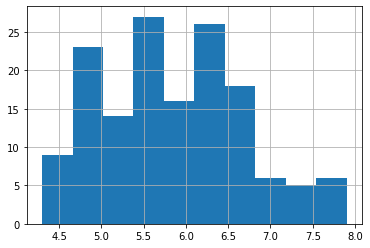

In [9]:
##histogram
df['Sepal length'].hist()

<AxesSubplot:>

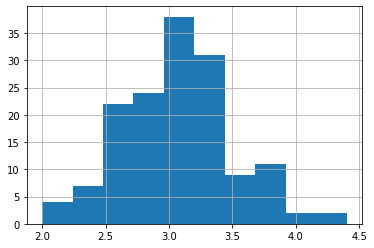

In [10]:
df['Sepal width'].hist()

<AxesSubplot:>

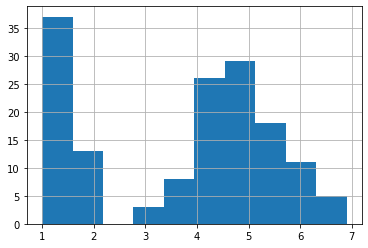

In [11]:
df['Petal length'].hist()

<AxesSubplot:>

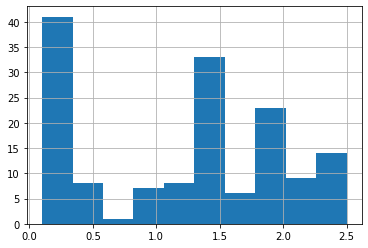

In [12]:
df['Petal width'].hist()

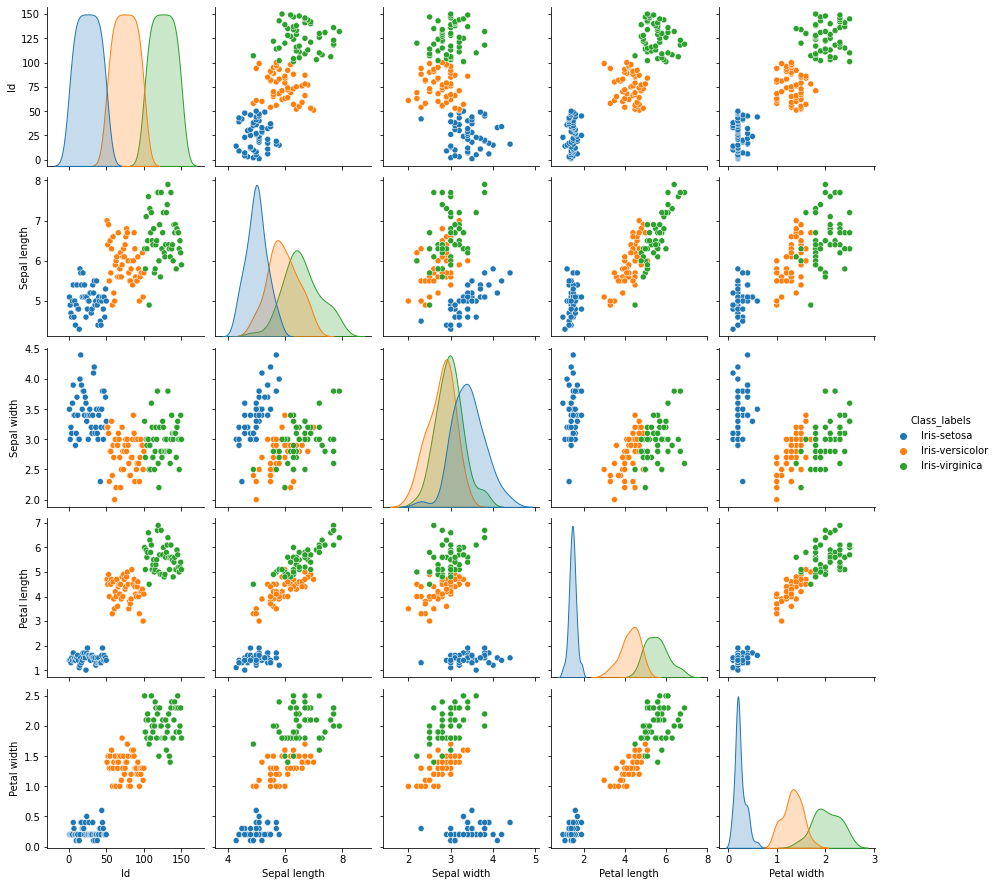

In [13]:
# Visualize our whole dataset
sns.pairplot(df , hue='Class_labels')

### Correlation Matrix

In [14]:
df.corr()

,Id,Sepal length,Sepal width,Petal length,Petal width
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
Sepal length,0.716676,1.000000,-0.109369,0.871754,0.817954
Sepal width,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
Petal length,0.882747,0.871754,-0.420516,1.000000,0.962757
Petal width,0.899759,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

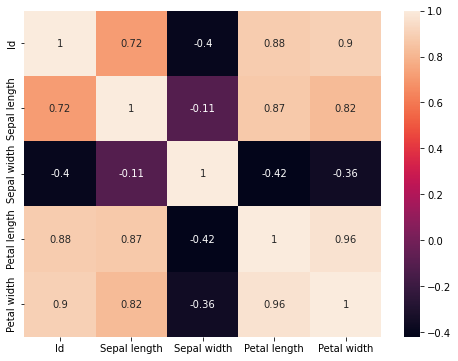

In [15]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(corr, annot = True, ax = ax)

### Label Encoder

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
df['Class_labels'] = le.fit_transform(df['Class_labels'])
df.head()

,Id,Sepal length,Sepal width,Petal length,Petal width,Class_labels
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


### Split the row and columns

In [18]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ["Class_labels"])
Y = df['Class_labels']
# print(X)
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Class_labels, Length: 150, dtype: int32


### Spliting the dataset into a training and testing data

In [19]:
from sklearn.linear_model import LogisticRegression
x_train, x_test,y_train, y_test = train_test_split(X ,Y ,test_size = 0.30)
# print(x_train)
print(y_train)

134    2
17     0
39     0
36     0
67     1
      ..
9      0
71     1
40     0
112    2
6      0
Name: Class_labels, Length: 105, dtype: int32


### Model 1 : Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  97.77777777777777


### Model 2 : knn - K-nearest neighbor

In [22]:
# knn - K-nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [23]:
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  100.0


### Model 3 : decision tree

In [24]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [25]:
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  100.0


###### Received the accuracy of 97.77 in the test dataset in model